In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate sample data for demonstration
def generate_sample_data(n_samples=1000):
    np.random.seed(42)

    # Generate timestamps
    timestamps = pd.date_range(start='2024-01-01', periods=n_samples, freq='5T')

    # Generate locations (simulating a child's regular movement patterns)
    lat_base = 12.9716
    lon_base = 77.5946

    # Create normal movement patterns with some random variation
    lat = lat_base + np.sin(np.linspace(0, 4*np.pi, n_samples)) * 0.01 + np.random.normal(0, 0.001, n_samples)
    lon = lon_base + np.cos(np.linspace(0, 4*np.pi, n_samples)) * 0.01 + np.random.normal(0, 0.001, n_samples)

    # Generate speed data
    speed = np.abs(np.sin(np.linspace(0, 2*np.pi, n_samples)) * 5 + np.random.normal(0, 0.5, n_samples))

    # Create DataFrame
    df = pd.DataFrame({
        'timestamp': timestamps,
        'latitude': lat,
        'longitude': lon,
        'speed': speed
    })

    return df

In [3]:
# Baseline Analytics: Movement Pattern Analysis
def analyze_movement_patterns(df):
    """Analyze basic movement patterns"""
    # Calculate time-based statistics
    df['hour'] = df['timestamp'].dt.hour
    hourly_stats = df.groupby('hour')['speed'].agg(['mean', 'std']).round(2)

    # Calculate location clusters
    coords = df[['latitude', 'longitude']].values
    kmeans = KMeans(n_clusters=5, random_state=42)
    df['cluster'] = kmeans.fit_predict(coords)

    return hourly_stats, kmeans.cluster_centers_

# Diagnostic Analytics: Anomaly Detection
def detect_anomalies(df):
    """Detect anomalous movements"""
    # Prepare features for anomaly detection
    features = df[['latitude', 'longitude', 'speed']].values
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Use Isolation Forest for anomaly detection
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    df['is_anomaly'] = iso_forest.fit_predict(features_scaled)

    return df[df['is_anomaly'] == -1]

In [4]:
# Prognostic Analytics: Movement Prediction
def predict_next_location(df, look_back=12):
    """Simple next location prediction based on moving averages"""
    df['lat_ma'] = df['latitude'].rolling(window=look_back).mean()
    df['lon_ma'] = df['longitude'].rolling(window=look_back).mean()

    # Predict next location (simple extrapolation)
    next_lat = df['lat_ma'].iloc[-1] + (df['lat_ma'].iloc[-1] - df['lat_ma'].iloc[-2])
    next_lon = df['lon_ma'].iloc[-1] + (df['lon_ma'].iloc[-1] - df['lon_ma'].iloc[-2])

    return next_lat, next_lon



In [5]:
# Main analysis function
def perform_analysis():
    # Generate sample data
    df = generate_sample_data()
    print("Dataset Shape:", df.shape)

    # 1. Baseline Analytics
    print("\n=== Baseline Analytics ===")
    hourly_stats, cluster_centers = analyze_movement_patterns(df)
    print("\nHourly Movement Statistics:")
    print(hourly_stats)

    # 2. Diagnostic Analytics
    print("\n=== Diagnostic Analytics ===")
    anomalies = detect_anomalies(df)
    print(f"\nDetected {len(anomalies)} anomalous movements")

    # 3. Prognostic Analytics
    print("\n=== Prognostic Analytics ===")
    next_lat, next_lon = predict_next_location(df)
    print(f"\nPredicted Next Location: ({next_lat:.6f}, {next_lon:.6f})")

    # Visualizations
    plt.figure(figsize=(15, 5))

    # Plot 1: Movement Pattern
    plt.subplot(131)
    plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='viridis', alpha=0.6)
    plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', s=200, linewidths=3)
    plt.title('Movement Clusters')

    # Plot 2: Speed Distribution
    plt.subplot(132)
    sns.histplot(data=df, x='speed', bins=30)
    plt.title('Speed Distribution')

    # Plot 3: Anomalies
    plt.subplot(133)
    plt.scatter(df['longitude'], df['latitude'], c='blue', alpha=0.1)
    plt.scatter(anomalies['longitude'], anomalies['latitude'], c='red', alpha=0.6)
    plt.title('Anomalous Movements')

    plt.tight_layout()
    plt.show()


<ipython-input-2-5e38fd0a7e4e>:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=n_samples, freq='5T')


Dataset Shape: (1000, 4)

=== Baseline Analytics ===

Hourly Movement Statistics:
      mean   std
hour            
0     2.83  1.80
1     3.02  1.75
2     3.05  1.37
3     2.89  1.22
4     2.85  1.08
5     3.01  1.14
6     2.93  0.96
7     2.95  1.26
8     2.95  1.29
9     2.75  1.54
10    2.85  1.56
11    3.32  1.51
12    3.49  1.26
13    3.50  1.53
14    3.62  1.78
15    3.47  1.88
16    3.48  2.16
17    3.43  2.24
18    3.46  2.15
19    3.39  1.98
20    3.54  1.86
21    3.50  1.59
22    3.65  1.41
23    3.64  1.21

=== Diagnostic Analytics ===

Detected 100 anomalous movements

=== Prognostic Analytics ===

Predicted Next Location: (12.970859, 77.604708)


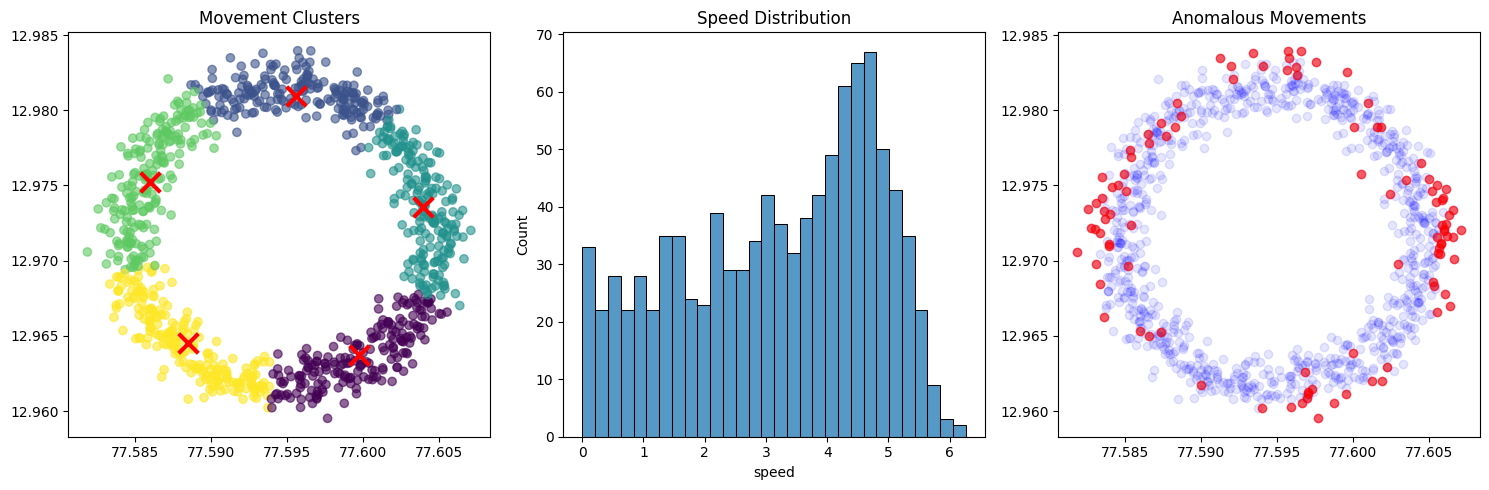

In [6]:
# Run the analysis
perform_analysis()

In [7]:
# Let's create a custom dataset with synthetic GPS tracking data for a child's movement.
# This dataset will include latitude, longitude, timestamp, battery level, and location type.
import pandas as pd
import numpy as np
import datetime

In [8]:
# Seed for reproducibility
np.random.seed(42)

# Define parameters for synthetic data generation
n_data_points = 1000
start_date = datetime.datetime(2024, 1, 1, 8, 0)  # Starting date and time
time_increment = datetime.timedelta(minutes=5)  # 5 minutes between each data point

# Define synthetic geofences (home and school coordinates)
home_coords = (37.7749, -122.4194)  # Example: San Francisco
school_coords = (37.7809, -122.4278)  # Slightly different location

# Generate data
timestamps = [start_date + i * time_increment for i in range(n_data_points)]
latitudes = np.random.normal(home_coords[0], 0.001, n_data_points)  # Most points near home_coords
longitudes = np.random.normal(home_coords[1], 0.001, n_data_points)
battery_levels = np.clip(np.linspace(100, 20, n_data_points) + np.random.normal(0, 1, n_data_points), 0, 100)

# Randomly add some points near the school to simulate movement
school_movement_indices = np.random.choice(range(n_data_points), size=100, replace=False)
latitudes[school_movement_indices] = np.random.normal(school_coords[0], 0.001, len(school_movement_indices))
longitudes[school_movement_indices] = np.random.normal(school_coords[1], 0.001, len(school_movement_indices))

# Define location type based on proximity to home or school
def get_location_type(lat, lon, home_coords, school_coords, radius=0.002):
    home_dist = np.sqrt((lat - home_coords[0])**2 + (lon - home_coords[1])**2)
    school_dist = np.sqrt((lat - school_coords[0])**2 + (lon - school_coords[1])**2)
    if home_dist < radius:
        return "home"
    elif school_dist < radius:
        return "school"
    else:
        return "other"

location_types = [get_location_type(lat, lon, home_coords, school_coords) for lat, lon in zip(latitudes, longitudes)]



In [9]:
# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'latitude': latitudes,
    'longitude': longitudes,
    'battery_level': battery_levels,
    'location_type': location_types
})

# Display the first few rows of the custom dataset
df.head()

,timestamp,latitude,longitude,battery_level,location_type
0,2024-01-01 08:00:00,37.775397,-122.418001,99.324822,home
1,2024-01-01 08:05:00,37.774762,-122.418475,99.775401,home
2,2024-01-01 08:10:00,37.775548,-122.419340,99.047420,home
3,2024-01-01 08:15:00,37.776423,-122.420047,99.451798,home
4,2024-01-01 08:20:00,37.774666,-122.418702,97.786065,home


In [10]:
# Initial analysis and visualization of the synthetic dataset

import matplotlib.pyplot as plt
import seaborn as sns

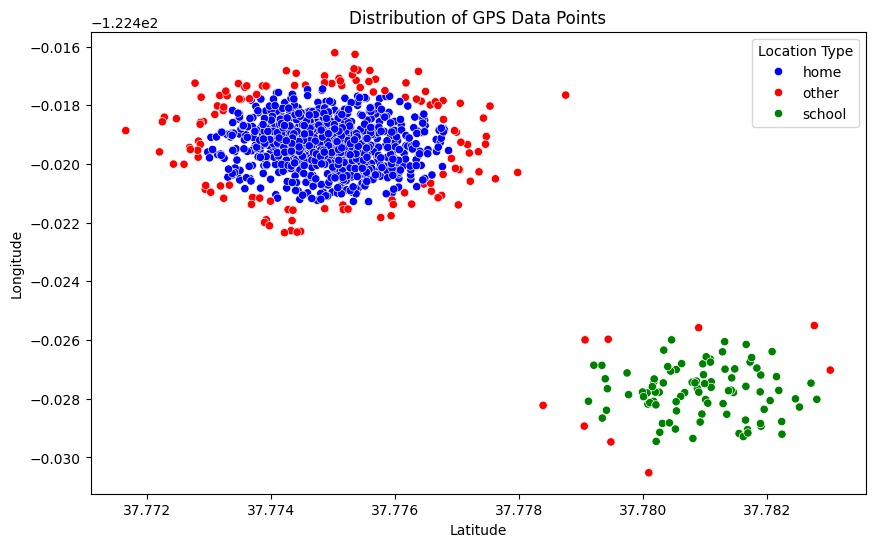

In [11]:
# Plot GPS data points to visualize home and school locations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='location_type', palette={'home': 'blue', 'school': 'green', 'other': 'red'})
plt.title('Distribution of GPS Data Points')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Location Type')
plt.show()

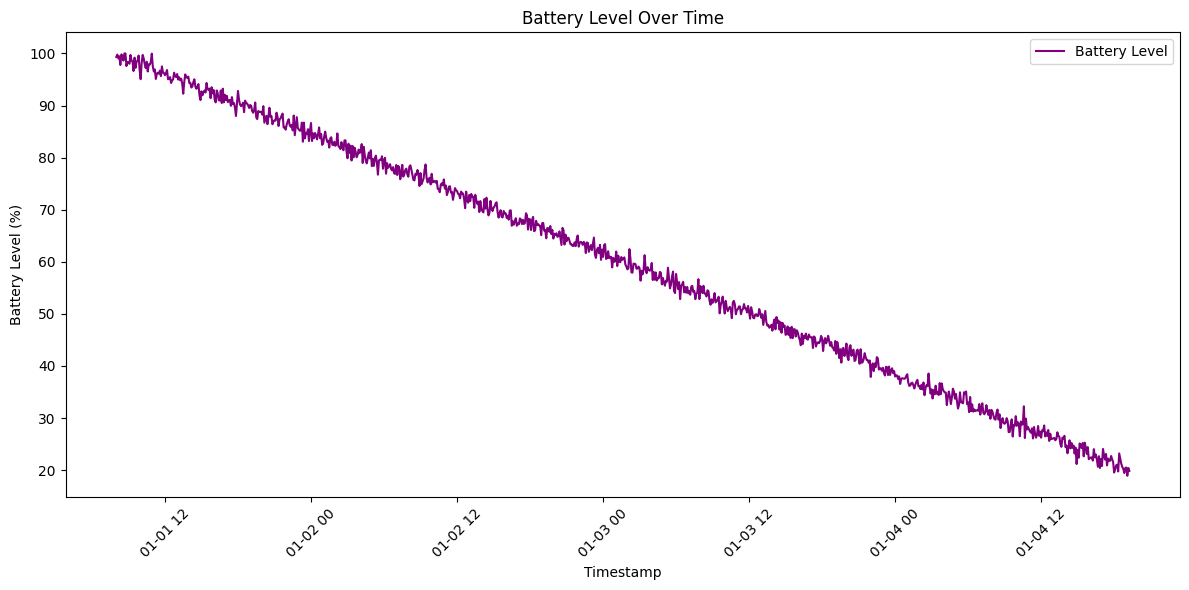

In [12]:

# Plot battery level over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['battery_level'], color='purple', label='Battery Level')
plt.xlabel('Timestamp')
plt.ylabel('Battery Level (%)')
plt.title('Battery Level Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-13-2d2ef64732f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location_type', palette='viridis')


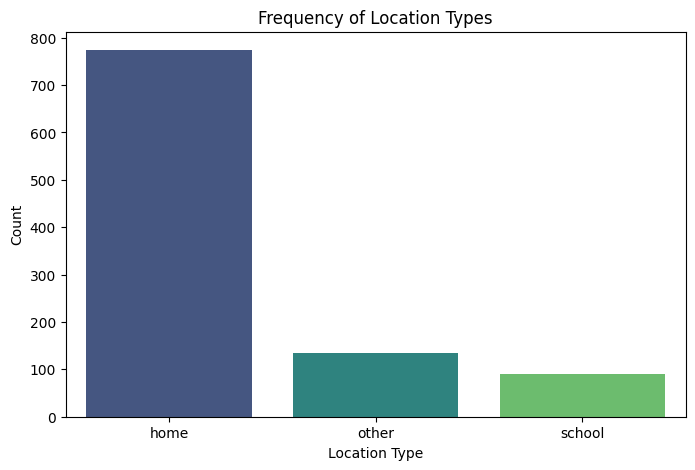

In [13]:
# Frequency of each location type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='location_type', palette='viridis')
plt.title('Frequency of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

**Below is a Python code snippet designed for Google Colab, which checks for geofence breaches and sends alerts if a child’s location deviates from designated "home" or "school" areas. This alert logic can also be extended to monitor battery level or unusual movement patterns.**

In [14]:
# Define home and school coordinates
home_coords = (37.7749, -122.4194)  # Example: San Francisco
school_coords = (37.7809, -122.4278)  # Slightly different location

# Function to calculate if the child is outside the geofence for home and school
from geopy.distance import geodesic

def check_geofence_alert(lat, lon, home_coords, school_coords, radius=0.002):
    """Check if a given point is outside both home and school geofences."""
    # Calculate distances from home and school
    distance_from_home = geodesic((lat, lon), home_coords).meters
    distance_from_school = geodesic((lat, lon), school_coords).meters

    # Check if outside both geofences (given radius in meters)
    if distance_from_home > radius * 1000 and distance_from_school > radius * 1000:
        return True  # Alert condition triggered
    return False

In [15]:
# Add a new column in the dataset for alerts based on location type and battery level
df['alert'] = df.apply(lambda row: check_geofence_alert(row['latitude'], row['longitude'], home_coords, school_coords), axis=1)

# Optional: Add battery alert condition
battery_threshold = 1  # Threshold battery level (20%)
df['battery_alert'] = df['battery_level'] < battery_threshold

# Combine alerts for location and battery
df['combined_alert'] = df['alert'] | df['battery_alert']

# Function to display alerts
def check_for_alerts(df):
    alerts = df[df['combined_alert']]
    for _, row in alerts.iterrows():
        alert_message = f"ALERT! Deviation detected at {row['timestamp']}. "
        if row['alert']:
            alert_message += "Child is outside of designated geofences. "
        if row['battery_alert']:
            alert_message += "Battery level is below threshold."
        print(alert_message)

# Run the alert check function
check_for_alerts(df)

ALERT! Deviation detected at 2024-01-01 08:00:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:05:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:10:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:15:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:20:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:25:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:30:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:35:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:40:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:45:00. Child is outside of designated geofences. 
ALERT! Deviation detected at 2024-01-01 08:50:00. Child is outside of 

**Project Based Code For child alert detection**

**Explanation of the Code
Real-Time Input:

The input_and_check_alert function takes user input for latitude, longitude, and battery level.
Each entry triggers a check against the geofences and battery threshold to determine whether an alert is needed.
Geofence and Battery Check:

The check_geofence_alert function checks if the entered location falls within any predefined geofences.
If the location is outside all geofences or if the battery level is below the threshold, an alert message is generated.
Interactive Prompt:

After displaying the alert message, the function prompts the user to enter another data set or exit.**

# test cases
Test Case 1: Inside a geofence (home)
Latitude: 37.7749
Longitude: -122.4194
Battery Level: 85%
Expected Output:

The location is within the "home" geofence.
Since the battery level is not below the threshold, the output should be:
[timestamp] Info: Child is safely within 'home'. Battery level: 85%.
Test Case 2: Outside all geofences
Latitude: 37.8000
Longitude: -122.5000
Battery Level: 50%
Expected Output:

The location is outside all geofences.
The output should be:
[timestamp] ALERT: Child is outside all designated geofences (Unknown Location).
Test Case 3: Inside a geofence (park) with low battery
Latitude: 37.7683
Longitude: -122.4825
Battery Level: 18%
Expected Output:

The location is within the "park" geofence.
Since the battery level is below the threshold, the output should be:
[timestamp] ALERT: Battery level is low (18%). Currently at park.
Test Case 4: Inside a geofence (school) with normal battery
Latitude: 37.7809
Longitude: -122.4278
Battery Level: 70%
Expected Output:

The location is within the "school" geofence.
Since the battery level is not below the threshold, the output should be:
[timestamp] Info: Child is safely within 'school'. Battery level: 70%.

In [16]:
import pandas as pd
from geopy.distance import geodesic
import datetime

# Define coordinates for multiple geofenced locations
geofences = {
    "home": (37.7749, -122.4194),
    "school": (37.7809, -122.4278),
    "park": (37.7683, -122.4825),
    "relative_house": (37.8044, -122.2711)
}

# Define battery threshold for alerts
battery_threshold = 20  # Battery level (%) below which alert should be triggered

# Function to check if a location falls within any geofence
def check_geofence_alert(lat, lon, geofences, radius=0.002):
    """
    Check if a given point (lat, lon) is within any defined geofences.
    Returns (alert_status, location_name) where alert_status is True if outside all geofences,
    and location_name is the geofence name or 'outside_geofences'.
    """
    for location_name, coords in geofences.items():
        distance = geodesic((lat, lon), coords).meters
        if distance <= radius * 1000:
            return False, location_name  # No alert needed, within geofence
    return True, "outside_geofences"  # Alert, outside all geofences

# Function to receive input and generate alerts
def input_and_check_alert():
    """
    This function prompts the user for latitude, longitude, and battery level
    and checks for any alerts based on geofencing and battery conditions.
    """
    while True:
        try:
            # Get inputs from the user
            timestamp = datetime.datetime.now()
            latitude = float(input("Enter Latitude: "))
            longitude = float(input("Enter Longitude: "))
            battery_level = float(input("Enter Battery Level (%): "))

            # Check geofence status
            alert_status, location_name = check_geofence_alert(latitude, longitude, geofences)

            # Determine if an alert should be raised
            if alert_status:
                alert_message = f"[{timestamp}] ALERT: Child is outside all designated geofences (Unknown Location)."
            elif battery_level < battery_threshold:
                alert_message = f"[{timestamp}] ALERT: Battery level is low ({battery_level}%). Currently at {location_name}."
            else:
                alert_message = f"[{timestamp}] Info: Child is safely within '{location_name}'. Battery level: {battery_level}%."

            # Display alert message
            print(alert_message)

        except ValueError:
            print("Invalid input. Please enter numeric values for latitude, longitude, and battery level.")

        # Option to continue or exit
        continue_input = input("Do you want to enter another set of data? (yes/no): ").strip().lower()
        if continue_input != 'yes':
            break

# Run the input and alert checking function
input_and_check_alert()


Enter Latitude: 37.7749
Enter Longitude: -122.4194
Enter Battery Level (%): 34
[2024-11-18 12:00:46.324451] Info: Child is safely within 'home'. Battery level: 34.0%.
Do you want to enter another set of data? (yes/no): yes
Enter Latitude: 37.7749
Enter Longitude: -122.4194
Enter Battery Level (%): 2
[2024-11-18 12:01:25.853174] ALERT: Battery level is low (2.0%). Currently at home.
Do you want to enter another set of data? (yes/no): no


# Emergency trigger
Changes Made:
Replaced input() with ipywidgets: This allows you to input latitude, longitude, and battery level directly via widgets in Colab.
Emergency Switch as a Button: An emergency button (emergency_button) is created using ipywidgets. When the button is pressed, it triggers an emergency alert.
Submit Button: A button (submit_button) is provided for submitting the entered data. When pressed, it triggers the generate_alert() function to check the location and battery status and display the appropriate message.
Multithreading Removed: Since the input() function is blocking and threading doesn't work well in Jupyter/Colab, I removed multithreading and instead used buttons to simulate the emergency switch.
How to Use:
Enter Latitude, Longitude, and Battery Level using the input fields.
Click "Check Alert" to check if the child is inside a geofence or if the battery is low.
Click "Activate Emergency Switch" to simulate an emergency situation, which will override normal checks with an emergency alert.

In [17]:
import pandas as pd
from geopy.distance import geodesic
import datetime
import ipywidgets as widgets
from IPython.display import display

# Define coordinates for multiple geofenced locations
geofences = {
    "home": (37.7749, -122.4194),
    "school": (37.7809, -122.4278),
    "park": (37.7683, -122.4825),
    "relative_house": (37.8044, -122.2711)
}

# Define battery threshold for alerts
battery_threshold = 20  # Battery level (%) below which alert should be triggered

# Emergency switch status
emergency_switch_active = False

# Function to check if a location falls within any geofence
def check_geofence_alert(lat, lon, geofences, radius=0.002):
    """
    Check if a given point (lat, lon) is within any defined geofences.
    Returns (alert_status, location_name) where alert_status is True if outside all geofences,
    and location_name is the geofence name or 'outside_geofences'.
    """
    for location_name, coords in geofences.items():
        distance = geodesic((lat, lon), coords).meters
        if distance <= radius * 1000:
            return False, location_name  # No alert needed, within geofence
    return True, "outside_geofences"  # Alert, outside all geofences

# Function to simulate emergency switch using a button in Google Colab
def on_emergency_button_click(b):
    global emergency_switch_active
    emergency_switch_active = True
    print("[Emergency Alert] Emergency switch activated! Triggering immediate action.")

# Function to generate alerts based on inputs
def generate_alert(latitude, longitude, battery_level):
    global emergency_switch_active  # Declare as global to modify the global variable
    timestamp = datetime.datetime.now()

    # Check geofence status
    alert_status, location_name = check_geofence_alert(latitude, longitude, geofences)

    # If emergency switch is activated, send emergency alert
    if emergency_switch_active:
        alert_message = f"[{timestamp}] EMERGENCY ALERT: Emergency switch activated! Immediate action required!"
        emergency_switch_active = False  # Reset emergency switch after activation
    else:
        # Determine if an alert should be raised
        if alert_status:
            alert_message = f"[{timestamp}] ALERT: Child is outside all designated geofences (Unknown Location)."
        elif battery_level < battery_threshold:
            alert_message = f"[{timestamp}] ALERT: Battery level is low ({battery_level}%). Currently at {location_name}."
        else:
            alert_message = f"[{timestamp}] Info: Child is safely within '{location_name}'. Battery level: {battery_level}%."

    # Display alert message
    print(alert_message)

# Widgets for input
latitude_input = widgets.FloatText(value=37.7749, description='Latitude:')
longitude_input = widgets.FloatText(value=-122.4194, description='Longitude:')
battery_level_input = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Battery Level:')
submit_button = widgets.Button(description="Check Alert")

# Emergency switch button
emergency_button = widgets.Button(description="Activate Emergency Switch")

# Register button click events
emergency_button.on_click(on_emergency_button_click)

# Function to handle the submit button click
def on_submit_button_click(b):
    latitude = latitude_input.value
    longitude = longitude_input.value
    battery_level = battery_level_input.value
    generate_alert(latitude, longitude, battery_level)

# Register submit button click event
submit_button.on_click(on_submit_button_click)

# Display the widgets
display(latitude_input, longitude_input, battery_level_input, submit_button, emergency_button)


FloatText(value=37.7749, description='Latitude:')

FloatText(value=-122.4194, description='Longitude:')

FloatSlider(value=50.0, description='Battery Level:', step=1.0)

Button(description='Check Alert', style=ButtonStyle())

Button(description='Activate Emergency Switch', style=ButtonStyle())

[2024-11-18 12:02:45.017966] Info: Child is safely within 'home'. Battery level: 51.0%.
[Email Alert] Sent email:
Subject: Urgent Alert: Geofence/Battery/Emergency Event

[2024-11-18 12:02:45.017966] Info: Child is safely within 'home'. Battery level: 51.0%.

[WhatsApp Alert] Sent WhatsApp message to +1234567890:
[2024-11-18 12:02:45.017966] Info: Child is safely within 'home'. Battery level: 51.0%.



# Further Action
Sending an Email Alert: After detecting an emergency, we can send an email to notify the concerned party (e.g., a parent or guardian).
Tracking Location History: Store location data and display a history of locations the user has visited.
Logging Emergency Actions: Log when the emergency switch is activated and perform an action, such as notifying a designated person.
Performing an Automated Action: After receiving a critical alert (e.g., low battery or geofence breach), an automated action like playing a sound or calling an API can be triggered.
We'll implement the following:

Sending Email Notifications: Using smtplib to send an email when an emergency occurs.
Location History Tracking: Storing visited locations and displaying them.
Logging Emergency Actions: Save emergency actions into a log file.

In [18]:
import pandas as pd
from geopy.distance import geodesic
import datetime
import random
import time

# Define coordinates for multiple geofenced locations
geofences = {
    "home": (37.7749, -122.4194),
    "school": (37.7809, -122.4278),
    "park": (37.7683, -122.4825),
    "relative_house": (37.8044, -122.2711)
}

# Define battery threshold for alerts
battery_threshold = 20  # Battery level (%) below which alert should be triggered

# Emergency switch status
emergency_switch_active = False

# Location history (simulation only)
location_history = []

# Function to check if a location falls within any geofence
def check_geofence_alert(lat, lon, geofences, radius=0.002):
    """
    Check if a given point (lat, lon) is within any defined geofences.
    Returns (alert_status, location_name) where alert_status is True if outside all geofences,
    and location_name is the geofence name or 'outside_geofences'.
    """
    for location_name, coords in geofences.items():
        distance = geodesic((lat, lon), coords).meters
        if distance <= radius * 1000:
            return False, location_name  # No alert needed, within geofence
    return True, "outside_geofences"  # Alert, outside all geofences

# Function to simulate emergency switch click
def simulate_emergency_switch():
    global emergency_switch_active
    # Randomly trigger the emergency switch
    if random.choice([True, False]):  # Randomly decide if emergency switch is activated
        emergency_switch_active = True
        print("[Emergency Alert] Emergency switch activated! Triggering immediate action.")
        log_emergency_action("Emergency switch activated")
        send_email_alert("Emergency switch activated!")
        send_whatsapp_alert("Emergency switch activated!")
    else:
        emergency_switch_active = False

# Function to generate alerts based on inputs
def generate_alert(latitude, longitude, battery_level):
    global emergency_switch_active  # Declare as global to modify the global variable
    timestamp = datetime.datetime.now()

    # Track location history
    location_history.append((latitude, longitude, timestamp))

    # Check geofence status
    alert_status, location_name = check_geofence_alert(latitude, longitude, geofences)

    # If emergency switch is activated, send emergency alert
    if emergency_switch_active:
        alert_message = f"[{timestamp}] EMERGENCY ALERT: Emergency switch activated! Immediate action required!"
        emergency_switch_active = False  # Reset emergency switch after activation
        log_emergency_action("Emergency switch activated")
        send_email_alert("Emergency switch activated!")
        send_whatsapp_alert("Emergency switch activated!")
    else:
        # Determine if an alert should be raised
        if alert_status:
            alert_message = f"[{timestamp}] ALERT: Child is outside all designated geofences (Unknown Location)."
        elif battery_level < battery_threshold:
            alert_message = f"[{timestamp}] ALERT: Battery level is low ({battery_level}%). Currently at {location_name}."
        else:
            alert_message = f"[{timestamp}] Info: Child is safely within '{location_name}'. Battery level: {battery_level}%."

    # Display alert message
    print(alert_message)
    # Simulate sending an email alert and WhatsApp message
    send_email_alert(alert_message)
    send_whatsapp_alert(alert_message)

# Log the emergency action
def log_emergency_action(action):
    with open("emergency_log.txt", "a") as log_file:
        log_file.write(f"[{datetime.datetime.now()}] {action}\n")
    print("[Log] Emergency action logged.")

# Simulate sending an email
def send_email_alert(message):
    # Simulating sending an email by printing the email content
    email_subject = "Urgent Alert: Geofence/Battery/Emergency Event"
    email_content = f"Subject: {email_subject}\n\n{message}"
    print(f"[Email Alert] Sent email:\n{email_content}\n")
    with open("email_log.txt", "a") as email_log:
        email_log.write(f"[{datetime.datetime.now()}] Sent Email: {email_content}\n")

# Simulate sending a WhatsApp alert
def send_whatsapp_alert(message):
    # Simulating sending a WhatsApp alert by printing the WhatsApp content
    whatsapp_number = "+1234567890"  # This is a mock number
    print(f"[WhatsApp Alert] Sent WhatsApp message to {whatsapp_number}:\n{message}\n")
    with open("whatsapp_log.txt", "a") as whatsapp_log:
        whatsapp_log.write(f"[{datetime.datetime.now()}] Sent WhatsApp: {message}\n")

# Function to simulate the program running with random inputs over time
def simulate_program():
    while True:
        # Randomly simulate latitude, longitude, and battery levels
        latitude = random.uniform(37.75, 37.80)  # Simulated latitude within a small range
        longitude = random.uniform(-122.48, -122.42)  # Simulated longitude within a small range
        battery_level = random.randint(10, 100)  # Random battery level between 10 and 100%

        # Simulate emergency switch click
        simulate_emergency_switch()

        # Generate alert based on current simulated input
        generate_alert(latitude, longitude, battery_level)

        # Simulate time delay before next cycle (e.g., every 3 seconds)
        time.sleep(3)

# Run the simulation
simulate_program()


[2024-11-18 12:01:45.779356] ALERT: Child is outside all designated geofences (Unknown Location).
[Email Alert] Sent email:
Subject: Urgent Alert: Geofence/Battery/Emergency Event

[2024-11-18 12:01:45.779356] ALERT: Child is outside all designated geofences (Unknown Location).

[WhatsApp Alert] Sent WhatsApp message to +1234567890:
[2024-11-18 12:01:45.779356] ALERT: Child is outside all designated geofences (Unknown Location).

[2024-11-18 12:01:48.786864] ALERT: Child is outside all designated geofences (Unknown Location).
[Email Alert] Sent email:
Subject: Urgent Alert: Geofence/Battery/Emergency Event

[2024-11-18 12:01:48.786864] ALERT: Child is outside all designated geofences (Unknown Location).

[WhatsApp Alert] Sent WhatsApp message to +1234567890:
[2024-11-18 12:01:48.786864] ALERT: Child is outside all designated geofences (Unknown Location).

[2024-11-18 12:01:51.793830] ALERT: Child is outside all designated geofences (Unknown Location).
[Email Alert] Sent email:
Subject:

KeyboardInterrupt: 

# Location plotting
Folium for creating interactive maps to visualize the location of the child over time.
Matplotlib for generating graphs of the child's latitude and longitude over time.
Random data generation to simulate the child's movement.
Here’s how we can do it:

Generate random movement for the child in terms of latitude and longitude within a small geographic range.
Plot the child’s position on an interactive map using Folium.
Track the position over time and plot a graph using Matplotlib to visualize changes in latitude and longitude over time.

Map saved as 'child_location_map.html'. Open it in your browser to view the map.


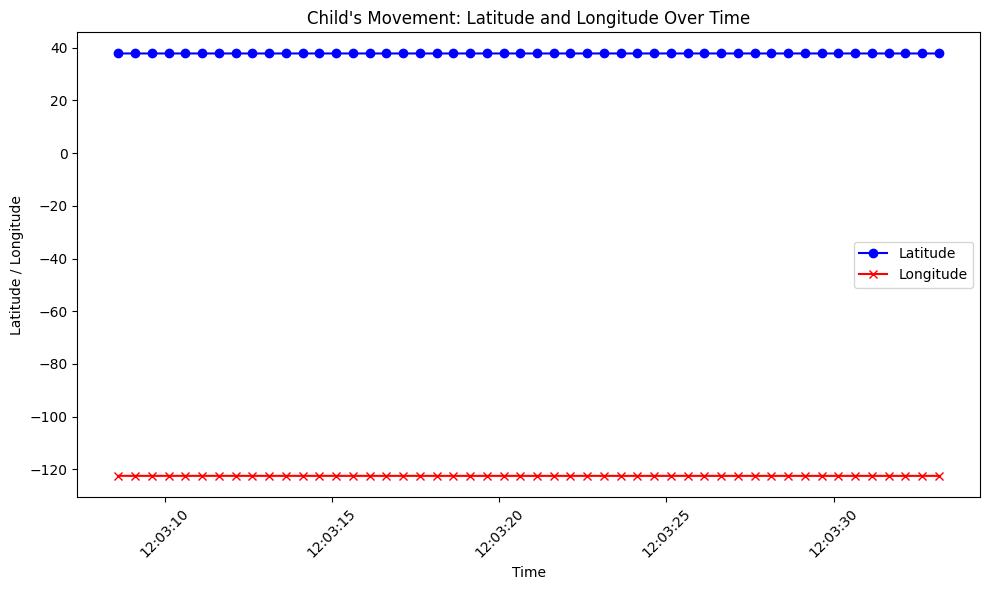

Total distance traveled by the child: 3.96 kilometers


In [19]:
import folium
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Initial Location (starting point for the simulation)
starting_lat = 37.7749  # San Francisco latitude
starting_lon = -122.4194  # San Francisco longitude

# Number of data points (simulated movements)
num_points = 50

# List to store simulated locations
locations = []

# Generate random locations within a small geographic range
def generate_random_location(lat, lon):
    # Simulate slight random movement around the initial position
    lat_offset = random.uniform(-0.001, 0.001)  # Change in latitude (roughly 100m)
    lon_offset = random.uniform(-0.001, 0.001)  # Change in longitude (roughly 100m)

    new_lat = lat + lat_offset
    new_lon = lon + lon_offset

    return new_lat, new_lon

# Simulate the movement of the child over time
for _ in range(num_points):
    new_lat, new_lon = generate_random_location(starting_lat, starting_lon)
    locations.append((new_lat, new_lon, datetime.datetime.now()))  # Store location with timestamp
    starting_lat, starting_lon = new_lat, new_lon  # Update the current location
    time.sleep(0.5)  # Simulate a delay (e.g., real-time data every 0.5 seconds)

# Map visualization using Folium
# Create a base map centered at the initial location
m = folium.Map(location=[locations[0][0], locations[0][1]], zoom_start=14)

# Plot the locations on the map
for loc in locations:
    folium.Marker([loc[0], loc[1]], popup=f"Time: {loc[2]}").add_to(m)

# Save the map to an HTML file
m.save("child_location_map.html")
print("Map saved as 'child_location_map.html'. Open it in your browser to view the map.")

# Plot the child's latitude and longitude over time using Matplotlib
times = [loc[2] for loc in locations]  # Extract timestamps
latitudes = [loc[0] for loc in locations]  # Extract latitudes
longitudes = [loc[1] for loc in locations]  # Extract longitudes

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot latitude and longitude over time
ax.plot(times, latitudes, label="Latitude", color='blue', marker='o')
ax.plot(times, longitudes, label="Longitude", color='red', marker='x')

# Format the x-axis as time
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# Set labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Latitude / Longitude")
ax.set_title("Child's Movement: Latitude and Longitude Over Time")
ax.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Further Analysis: You can add any additional analysis here (e.g., velocity, distance, etc.)
# For example, let's calculate the total distance traveled by the child.

def calculate_total_distance(locations):
    total_distance = 0
    for i in range(1, len(locations)):
        loc1 = locations[i-1]
        loc2 = locations[i]
        # Calculate distance between two points using Haversine formula
        lat1, lon1 = loc1[0], loc1[1]
        lat2, lon2 = loc2[0], loc2[1]
        R = 6371  # Radius of the Earth in kilometers
        phi1 = np.radians(lat1)
        phi2 = np.radians(lat2)
        delta_phi = np.radians(lat2 - lat1)
        delta_lambda = np.radians(lon2 - lon1)

        a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        distance = R * c  # Distance in kilometers
        total_distance += distance
    return total_distance

# Calculate and print total distance traveled
total_distance = calculate_total_distance(locations)
print(f"Total distance traveled by the child: {total_distance:.2f} kilometers")

# How This Code Works:
Random Location Generation: The generate_random_location() function generates random latitude and longitude values around the initial starting point to simulate the child's movement. This simulates the child walking around an area.

Map Visualization:

The Folium library creates an interactive map centered around the initial location, plotting markers for each simulated location the child visits.
The map is saved as child_location_map.html, which can be opened in a web browser to view the simulated movement.
Latitude and Longitude Over Time Graph:

The program uses Matplotlib to plot the latitude and longitude changes over time. The x-axis represents time (timestamps), and the y-axis represents the latitude and longitude.
This helps visualize the child's movement over time with a clear distinction between latitude (blue line) and longitude (red line).
Total Distance Calculation:

The calculate_total_distance() function uses the Haversine formula to calculate the total distance the child has traveled based on the latitude and longitude of each point. This gives the total distance traveled in kilometers.
Simulation Delay:

The program introduces a small delay (time.sleep(0.5)) to simulate real-time data generation every 0.5 seconds.
Output:
Interactive Map: The map is saved as child_location_map.html. When opened in a web browser, it will show the movement of the child as markers plotted on the map.
Graph Plot: A plot will be generated showing the child’s latitude and longitude over time.
Distance Traveled: The total distance traveled by the child is calculated and displayed in the console.
Additional Features:
You can adjust the simulation parameters, such as the range of random movements, the number of points, or the delay, to customize the simulation.
You could add more analysis, such as speed calculations, velocity over time, or advanced geospatial analysis like clustering or anomaly detection.

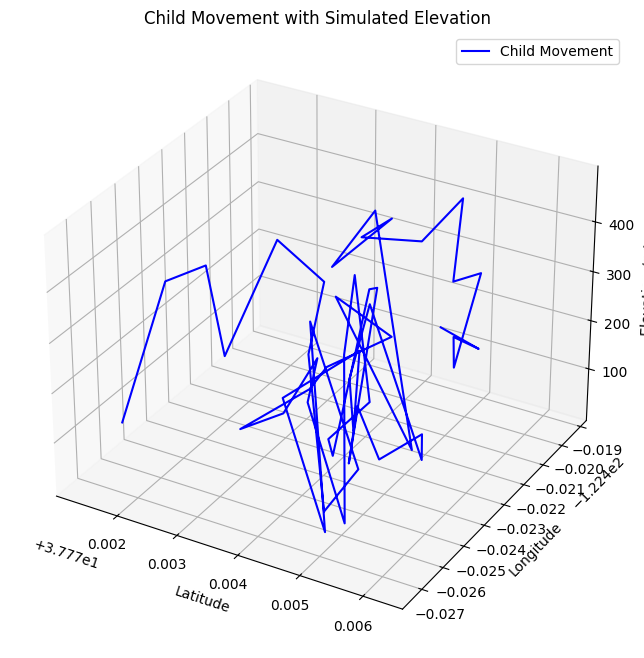

In [20]:

# 3D Analysis of Child Movement (Simulating Elevation)

# Simulate Elevation Data (replace with real elevation data if available)
def simulate_elevation(lat, lon):
    """Simulates elevation based on latitude and longitude."""
    # Replace with a real-world elevation API if available
    # Example: Using a random elevation within a range
    return random.uniform(0, 500)  # Elevation in meters

# Update locations with simulated elevation
locations_with_elevation = []
for lat, lon, timestamp in locations:
    elevation = simulate_elevation(lat, lon)
    locations_with_elevation.append((lat, lon, elevation, timestamp))

# Plot 3D Movement with Elevation using Matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z (latitude, longitude, elevation) coordinates
x = [loc[0] for loc in locations_with_elevation]
y = [loc[1] for loc in locations_with_elevation]
z = [loc[2] for loc in locations_with_elevation]

# Plot the 3D trajectory
ax.plot(x, y, z, label='Child Movement', color='blue')

# Customize the plot
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Elevation (m)')
ax.set_title('Child Movement with Simulated Elevation')
ax.legend()

plt.show()


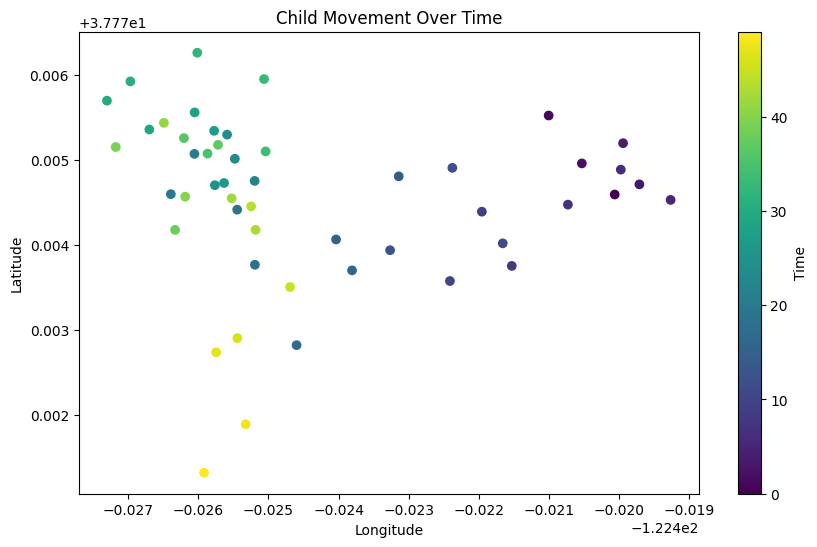

In [21]:


# Assuming you have the 'locations' list from the previous code

# Extract latitude, longitude, and timestamp from the locations list
latitudes = [loc[0] for loc in locations]
longitudes = [loc[1] for loc in locations]
timestamps = [loc[2] for loc in locations]


# Create a scatter plot of the child's movement over time
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=range(len(locations)), cmap='viridis')  # Color by time
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Child Movement Over Time')
plt.colorbar(label='Time')
plt.show()


# Analyze the movement pattern
# For example, you can calculate the average speed or the distance traveled over time.
# Note that the current example provides simulated data so the speed and distance might be unreal.

# For real-world applications, you would likely integrate sensor data
# to get actual distances and velocities.


# You can enhance this analysis by implementing:
# - Clustering algorithms (e.g., K-Means) to identify areas where the child frequently visits.
# - Anomaly detection to identify unusual movements or patterns.
# - Integration of real-time location data to provide up-to-date information.


**MAP RETRIEVING AND ALARM PLAYING**

In [22]:
#MAP create a code for map masking for a particuar location

CHILD MOVEMEMENT UPDATE WITH RANDOM VALUES FOR LOCATION

In [23]:
# Install required libraries
!pip install folium branca geopy

import folium
from folium import Map, Marker, Circle, Popup
from geopy.distance import geodesic
import random
import time
from IPython.display import display, clear_output

# Safe zone center and radius (define the geofence)
safe_zone_center = (12.971598, 77.594566)  # Example coordinates: Bangalore City Center
safe_zone_radius = 500  # Safe zone radius in meters

# Initialize the map
child_map = folium.Map(location=safe_zone_center, zoom_start=15)

# Add the safe zone to the map
folium.Circle(
    location=safe_zone_center,
    radius=safe_zone_radius,
    color="green",
    fill=True,
    fill_opacity=0.3,
    tooltip="Safe Zone",
).add_to(child_map)

# Function to calculate if a point is inside the geofence
def is_within_safe_zone(child_location, center, radius):
    return geodesic(child_location, center).meters <= radius

# Function to simulate human-like movement
def generate_human_like_movement(start_location):
    # Add random small changes to latitude and longitude to simulate human-like walking movement
    new_lat = start_location[0] + random.uniform(0.0001, 0.0005)  # Small latitude changes
    new_lon = start_location[1] + random.uniform(0.0001, 0.0005)  # Small longitude changes
    return (new_lat, new_lon)

# Function to simulate live location tracking
def simulate_child_tracking():
    current_location = safe_zone_center  # Start at the center of the safe zone

    while True:
        # Generate new location
        current_location = generate_human_like_movement(current_location)

        # Clear the output for real-time updates
        clear_output(wait=True)

        # Initialize the map
        child_map = folium.Map(location=safe_zone_center, zoom_start=15)

        # Add the safe zone to the map
        folium.Circle(
            location=safe_zone_center,
            radius=safe_zone_radius,
            color="green",
            fill=True,
            fill_opacity=0.3,
            tooltip="Safe Zone",
        ).add_to(child_map)

        # Add the child's current location to the map
        folium.Marker(
            location=current_location,
            popup=Popup("Child's Current Location", parse_html=True),
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(child_map)

        # Check if the child is outside the safe zone
        if not is_within_safe_zone(current_location, safe_zone_center, safe_zone_radius):
            # Add a red marker for the emergency location
            folium.Marker(
                location=current_location,
                popup=Popup("⚠️ Emergency! Child has left the safe zone!", parse_html=True),
                icon=folium.Icon(color="red", icon="warning-sign"),
            ).add_to(child_map)

            # Display emergency alert
            print("🚨 Emergency Alert: Child has exited the safe zone!")
        else:
            # Indicate the child is safe
            print("✅ Child is within the safe zone.")

        # Display the updated map
        display(child_map)

        # Simulate data update delay (2 seconds)
        time.sleep(2)

# Run the simulation
simulate_child_tracking()


✅ Child is within the safe zone.


KeyboardInterrupt: 

**Geofence Masking in the Map**

In [24]:
# Install required libraries
!pip install folium geopy ipywidgets

import folium
from geopy.distance import geodesic
from ipywidgets import interact, widgets
import random
import time
from IPython.display import display, clear_output

# Global variables for geofence center and radius
geofence_center = None
geofence_radius = 500  # Default radius in meters

# Function to initialize the map with a click-to-select geofence center
def initialize_geofence_selection():
    # Create a folium map
    selection_map = folium.Map(location=(12.971598, 77.594566), zoom_start=15)

    # Add click handler for selecting the geofence center
    def handle_click(event):
        global geofence_center
        geofence_center = (event.latlng[0], event.latlng[1])
        print(f"📍 Geofence center set at: {geofence_center}")

    # Display map for geofence center selection
    selection_map.add_child(folium.LatLngPopup())  # Enable showing clicked coordinates
    display(selection_map)
    print("📍 Click on the map to set the geofence center. Copy the coordinates shown and enter below.")

# Function to check if the child is within the geofence
def is_within_geofence(location, center, radius):
    return geodesic(location, center).meters <= radius

# Function to simulate random movement within a reasonable range
def generate_human_like_movement(start_location):
    new_lat = start_location[0] + random.uniform(-0.0005, 0.0005)  # Small latitude changes
    new_lon = start_location[1] + random.uniform(-0.0005, 0.0005)  # Small longitude changes
    return (new_lat, new_lon)

# Function to simulate child tracking
def simulate_child_tracking():
    global geofence_center, geofence_radius
    current_location = geofence_center  # Start at the geofence center

    while True:
        # Generate a new location
        current_location = generate_human_like_movement(current_location)

        # Clear the output for real-time updates
        clear_output(wait=True)

        # Initialize the map
        tracking_map = folium.Map(location=geofence_center, zoom_start=15)

        # Add the geofence to the map
        folium.Circle(
            location=geofence_center,
            radius=geofence_radius,
            color="green",
            fill=True,
            fill_opacity=0.3,
            tooltip="Safe Zone",
        ).add_to(tracking_map)

        # Add the child's current location
        folium.Marker(
            location=current_location,
            popup=f"Child's Location: {current_location}",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(tracking_map)

        # Check if the child is outside the geofence
        if not is_within_geofence(current_location, geofence_center, geofence_radius):
            folium.Marker(
                location=current_location,
                popup="⚠️ Emergency! Child left the safe zone!",
                icon=folium.Icon(color="red", icon="warning-sign"),
            ).add_to(tracking_map)
            print("🚨 Emergency Alert: Child has exited the geofence!")
        else:
            print("✅ Child is within the geofence.")

        # Display the updated map
        display(tracking_map)

        # Simulate data update delay
        time.sleep(2)

# Main function to run the program
def main():
    global geofence_center

    print("1️⃣ Select the geofence center by clicking on the map.")
    initialize_geofence_selection()

    # Wait for user to input coordinates
    lat = float(input("Enter the latitude of the geofence center: "))
    lon = float(input("Enter the longitude of the geofence center: "))
    geofence_center = (lat, lon)

    print(f"\n📌 Geofence center set to: {geofence_center}")
    print("\n2️⃣ Starting the child tracking simulation...")
    simulate_child_tracking()

# Run the program
main()


✅ Child is within the geofence.


KeyboardInterrupt: 

EMERGENCY BUTTON SIMULATION FOR POLICE ATTENTION ALSO

In [25]:
# Install required libraries
!pip install folium geopy

import folium
from geopy.distance import geodesic
from IPython.display import display, clear_output
import random
import time

# Global Variables
child_location = None
safe_zone_center = (12.971598, 77.594566)  # Default center for geofence (Bangalore City Center)
safe_zone_radius = 500  # Safe zone radius in meters
police_stations = [
    (12.975598, 77.598566, "Station 1"),
    (12.970000, 77.590000, "Station 2"),
    (12.965000, 77.600000, "Station 3"),
    (12.980000, 77.585000, "Station 4"),
]  # Simulated police station coordinates with names

# Function to check if a point is inside the safe zone
def is_within_safe_zone(location, center, radius):
    return geodesic(location, center).meters <= radius

# Function to simulate random movement within a realistic range
def generate_human_like_movement(start_location):
    new_lat = start_location[0] + random.uniform(0.0001, 0.0005)  # Small latitude changes
    new_lon = start_location[1] + random.uniform(0.0001, 0.0005)  # Small longitude changes
    return (new_lat, new_lon)

# Function to find nearby police stations within a certain radius
def find_nearby_police_stations(child_location, radius=2000):
    nearby_stations = []
    for station in police_stations:
        station_location = (station[0], station[1])
        if geodesic(child_location, station_location).meters <= radius:
            nearby_stations.append(station)
    return nearby_stations

# Function to simulate emergency situation and notify parent
def handle_emergency(child_location):
    print("🚨 Emergency! The child has pressed the emergency button.")
    print("📩 Sending alert to parent: 'Child is in an emergency situation.'")

    # Find nearby police stations
    nearby_stations = find_nearby_police_stations(child_location)
    print(f"🛂 Found {len(nearby_stations)} nearby police station(s):")
    for station in nearby_stations:
        print(f"- {station[2]} at location {station[0]}, {station[1]}")

    # Visualize the emergency on the map
    emergency_map = folium.Map(location=child_location, zoom_start=15)

    # Add child's location
    folium.Marker(
        location=child_location,
        popup="Child's Emergency Location",
        icon=folium.Icon(color="red", icon="exclamation-sign"),
    ).add_to(emergency_map)

    # Add nearby police stations to the map
    for station in nearby_stations:
        folium.Marker(
            location=(station[0], station[1]),
            popup=f"{station[2]} (Police Station)",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(emergency_map)

    # Display the map
    display(emergency_map)

# Function to simulate child tracking and emergency handling
def simulate_child_tracking():
    global child_location
    child_location = safe_zone_center  # Start at the safe zone center

    while True:
        # Generate new child location
        child_location = generate_human_like_movement(child_location)

        # Clear the output for real-time updates
        clear_output(wait=True)

        # Create a map
        tracking_map = folium.Map(location=safe_zone_center, zoom_start=15)

        # Add the safe zone
        folium.Circle(
            location=safe_zone_center,
            radius=safe_zone_radius,
            color="green",
            fill=True,
            fill_opacity=0.3,
            tooltip="Safe Zone",
        ).add_to(tracking_map)

        # Add the child's current location
        folium.Marker(
            location=child_location,
            popup="Child's Current Location",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(tracking_map)

        # Check if the child is outside the safe zone
        if not is_within_safe_zone(child_location, safe_zone_center, safe_zone_radius):
            folium.Marker(
                location=child_location,
                popup="⚠️ Emergency! Child left the safe zone!",
                icon=folium.Icon(color="red", icon="warning-sign"),
            ).add_to(tracking_map)
            print("🚨 Emergency Alert: Child has exited the safe zone!")
            handle_emergency(child_location)
        else:
            print("✅ Child is within the safe zone.")

        # Display the map
        display(tracking_map)

        # Simulate data update delay
        time.sleep(3)

# Main function to run the program
def main():
    print("1️⃣ Starting child tracking simulation...")
    simulate_child_tracking()

# Run the program
main()


✅ Child is within the safe zone.


KeyboardInterrupt: 

In [26]:
# Install required libraries
!pip install folium geopy ipywidgets

import folium
from geopy.distance import geodesic
from ipywidgets import Button, VBox
from IPython.display import display, clear_output
import random
import time

# Global Variables
child_location = None
safe_zone_center = (12.971598, 77.594566)  # Default center for geofence (Bangalore City Center)
safe_zone_radius = 500  # Safe zone radius in meters
police_stations = [
    (12.975598, 77.598566, "Station 1"),
    (12.970000, 77.590000, "Station 2"),
    (12.965000, 77.600000, "Station 3"),
    (12.980000, 77.585000, "Station 4"),
]  # Simulated police station coordinates with names

# Function to check if a point is inside the safe zone
def is_within_safe_zone(location, center, radius):
    return geodesic(location, center).meters <= radius

# Function to simulate random movement within a realistic range
def generate_human_like_movement(start_location):
    new_lat = start_location[0] + random.uniform(-0.0005, 0.0005)  # Small latitude changes
    new_lon = start_location[1] + random.uniform(-0.0005, 0.0005)  # Small longitude changes
    return (new_lat, new_lon)

# Function to find nearby police stations within a certain radius
def find_nearby_police_stations(child_location, radius=2000):
    nearby_stations = []
    for station in police_stations:
        station_location = (station[0], station[1])
        if geodesic(child_location, station_location).meters <= radius:
            nearby_stations.append(station)
    return nearby_stations

# Function to simulate emergency situation and notify parent
def handle_emergency(child_location):
    print("🚨 Emergency! The child has pressed the emergency button.")
    print("📩 Sending alert to parent: 'Child is in an emergency situation.'")

    # Find nearby police stations
    nearby_stations = find_nearby_police_stations(child_location)
    print(f"🛂 Found {len(nearby_stations)} nearby police station(s):")
    for station in nearby_stations:
        print(f"- {station[2]} at location {station[0]}, {station[1]}")

    # Visualize the emergency on the map
    emergency_map = folium.Map(location=child_location, zoom_start=15)

    # Add child's location
    folium.Marker(
        location=child_location,
        popup="Child's Emergency Location",
        icon=folium.Icon(color="red", icon="exclamation-sign"),
    ).add_to(emergency_map)

    # Add nearby police stations to the map
    for station in nearby_stations:
        folium.Marker(
            location=(station[0], station[1]),
            popup=f"{station[2]} (Police Station)",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(emergency_map)

    # Display the map
    display(emergency_map)

# Function to simulate child tracking and add emergency button
def simulate_child_tracking():
    global child_location
    child_location = safe_zone_center  # Start at the safe zone center

    # Create an emergency button
    emergency_button = Button(description="🚨 Emergency Alert", button_style="danger")

    # Define button click event
    def on_emergency_button_click(b):
        handle_emergency(child_location)

    # Link the button to the click event
    emergency_button.on_click(on_emergency_button_click)

    # Display the button
    display(VBox([emergency_button]))

    while True:
        # Generate new child location
        child_location = generate_human_like_movement(child_location)

        # Clear the output for real-time updates
        clear_output(wait=True)
        display(VBox([emergency_button]))  # Redisplay the button after clearing output

        # Create a map
        tracking_map = folium.Map(location=safe_zone_center, zoom_start=15)

        # Add the safe zone
        folium.Circle(
            location=safe_zone_center,
            radius=safe_zone_radius,
            color="green",
            fill=True,
            fill_opacity=0.3,
            tooltip="Safe Zone",
        ).add_to(tracking_map)

        # Add the child's current location
        folium.Marker(
            location=child_location,
            popup="Child's Current Location",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(tracking_map)

        # Check if the child is outside the safe zone
        if not is_within_safe_zone(child_location, safe_zone_center, safe_zone_radius):
            folium.Marker(
                location=child_location,
                popup="⚠️ Emergency! Child left the safe zone!",
                icon=folium.Icon(color="red", icon="warning-sign"),
            ).add_to(tracking_map)
            print("🚨 Emergency Alert: Child has exited the safe zone!")
            handle_emergency(child_location)
        else:
            print("✅ Child is within the safe zone.")

        # Display the map
        display(tracking_map)

        # Simulate data update delay
        time.sleep(3)

# Main function to run the program
def main():
    print("1️⃣ Starting child tracking simulation...")
    simulate_child_tracking()

# Run the program
main()


✅ Child is within the safe zone.


KeyboardInterrupt: 

🚨 Emergency! The child has pressed the emergency button.
📩 Sending alert to parent: 'Child is in an emergency situation.'
🛂 Found 4 nearby police station(s):
- Station 1 at location 12.975598, 77.598566
- Station 2 at location 12.97, 77.59
- Station 3 at location 12.965, 77.6
- Station 4 at location 12.98, 77.585


🚨 Emergency! The child has pressed the emergency button.
📩 Sending alert to parent: 'Child is in an emergency situation.'
🛂 Found 4 nearby police station(s):
- Station 1 at location 12.975598, 77.598566
- Station 2 at location 12.97, 77.59
- Station 3 at location 12.965, 77.6
- Station 4 at location 12.98, 77.585


🚨 Emergency! The child has pressed the emergency button.
📩 Sending alert to parent: 'Child is in an emergency situation.'
🛂 Found 4 nearby police station(s):
- Station 1 at location 12.975598, 77.598566
- Station 2 at location 12.97, 77.59
- Station 3 at location 12.965, 77.6
- Station 4 at location 12.98, 77.585


In [27]:
# Install required libraries
!pip install folium geopy ipywidgets

import folium
from geopy.distance import geodesic
from ipywidgets import Button, VBox
from IPython.display import display, clear_output
import random
import time

# Global Variables
child_location = None
safe_zone_center = (12.971598, 77.594566)  # Default center for geofence (Bangalore City Center)
safe_zone_radius = 500  # Safe zone radius in meters
police_stations = [
    (12.975598, 77.598566, "Station 1"),
    (12.970000, 77.590000, "Station 2"),
    (12.965000, 77.600000, "Station 3"),
    (12.980000, 77.585000, "Station 4"),
]  # Simulated police station coordinates with names

# Function to check if a point is inside the safe zone
def is_within_safe_zone(location, center, radius):
    return geodesic(location, center).meters <= radius

# Function to simulate random movement within a realistic range
def generate_human_like_movement(start_location):
    new_lat = start_location[0] + random.uniform(-0.0005, 0.0005)  # Small latitude changes
    new_lon = start_location[1] + random.uniform(-0.0005, 0.0005)  # Small longitude changes
    return (new_lat, new_lon)

# Function to find nearby police stations within a certain radius
def find_nearby_police_stations(child_location, radius=2000):
    nearby_stations = []
    for station in police_stations:
        station_location = (station[0], station[1])
        if geodesic(child_location, station_location).meters <= radius:
            nearby_stations.append(station)
    return nearby_stations

# Function to handle an emergency situation
def handle_emergency(child_location):
    print("🚨 Emergency Alert Activated! Sending notification to parent...")

    # Find nearby police stations
    nearby_stations = find_nearby_police_stations(child_location)
    print(f"🛂 Found {len(nearby_stations)} nearby police station(s):")
    for station in nearby_stations:
        print(f"- {station[2]} at location {station[0]}, {station[1]}")

    # Visualize the emergency on the map
    emergency_map = folium.Map(location=child_location, zoom_start=15)

    # Add child's location
    folium.Marker(
        location=child_location,
        popup="🚨 Child's Emergency Location",
        icon=folium.Icon(color="red", icon="exclamation-sign"),
    ).add_to(emergency_map)

    # Add nearby police stations to the map
    for station in nearby_stations:
        folium.Marker(
            location=(station[0], station[1]),
            popup=f"🚓 {station[2]} (Police Station)",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(emergency_map)

    # Add alert visuals like a circle for high alert
    folium.Circle(
        location=child_location,
        radius=200,
        color="red",
        fill=True,
        fill_opacity=0.4,
        tooltip="Emergency Zone",
    ).add_to(emergency_map)

    # Display the map
    display(emergency_map)
    print("🚔 Police have been notified and are responding.")

# Function to simulate child tracking with emergency button
def simulate_child_tracking():
    global child_location
    child_location = safe_zone_center  # Start at the safe zone center

    # Create an emergency button
    emergency_button = Button(description="🚨 Emergency Alert", button_style="danger")

    # Define button click event
    def on_emergency_button_click(b):
        # When the button is clicked, the emergency alert is triggered
        print("🔔 Emergency button clicked!")
        handle_emergency(child_location)

    # Link the button to the click event
    emergency_button.on_click(on_emergency_button_click)

    # Display the button
    display(VBox([emergency_button]))

    while True:
        # Generate new child location (moving around randomly within the safe zone)
        child_location = generate_human_like_movement(child_location)

        # Clear the output for real-time updates
        clear_output(wait=True)
        display(VBox([emergency_button]))  # Redisplay the button after clearing output

        # Create a map
        tracking_map = folium.Map(location=safe_zone_center, zoom_start=15)

        # Add the safe zone
        folium.Circle(
            location=safe_zone_center,
            radius=safe_zone_radius,
            color="green",
            fill=True,
            fill_opacity=0.3,
            tooltip="Safe Zone",
        ).add_to(tracking_map)

        # Add the child's current location
        folium.Marker(
            location=child_location,
            popup="Child's Current Location",
            icon=folium.Icon(color="blue", icon="info-sign"),
        ).add_to(tracking_map)

        # Check if the child is outside the safe zone
        if not is_within_safe_zone(child_location, safe_zone_center, safe_zone_radius):
            folium.Marker(
                location=child_location,
                popup="⚠️ Emergency! Child left the safe zone!",
                icon=folium.Icon(color="red", icon="warning-sign"),
            ).add_to(tracking_map)
            print("🚨 Emergency Alert: Child has exited the safe zone!")
            handle_emergency(child_location)
        else:
            print("✅ Child is within the safe zone.")

        # Display the map
        display(tracking_map)

        # Simulate data update delay
        time.sleep(3)

# Main function to run the program
def main():
    print("1️⃣ Starting child tracking simulation...")
    simulate_child_tracking()

# Run the program
main()


✅ Child is within the safe zone.


KeyboardInterrupt: 

🔔 Emergency button clicked!
🚨 Emergency Alert Activated! Sending notification to parent...
🛂 Found 4 nearby police station(s):
- Station 1 at location 12.975598, 77.598566
- Station 2 at location 12.97, 77.59
- Station 3 at location 12.965, 77.6
- Station 4 at location 12.98, 77.585


🚔 Police have been notified and are responding.
🔔 Emergency button clicked!
🚨 Emergency Alert Activated! Sending notification to parent...
🛂 Found 4 nearby police station(s):
- Station 1 at location 12.975598, 77.598566
- Station 2 at location 12.97, 77.59
- Station 3 at location 12.965, 77.6
- Station 4 at location 12.98, 77.585


🚔 Police have been notified and are responding.
